In [1]:
import pandas as pd

In [2]:
DATASET_PATH = "../../../Dataset/Collected Dataset/"

# flow data
flow_files = {
    "ddos_flood": [
        "tcp_ddos_flood.csv",
        "icmp_ddos_flood.csv",
        "udp_ddos_flood.csv"
    ],
    "probe": [
        "nmap_probe_attack.csv",
    ],
    "land": [
        "land_attack.csv",
    ],
    "malformed": [
        "malformed_packets.csv",
    ],
    "nestea": [
        "nestea_attack.csv",
    ],
    "pod": [
        "ping_of_death_attack.csv"
    ],
    "normal": [
        "normal_iperf.csv",
        "normal_w3m.csv"
    ]
}

In [3]:
dfs = []

for attack_type, files in flow_files.items():
    for file in files:
        try:
            data = pd.read_csv(DATASET_PATH + file)
            data["type"] = attack_type
            dfs.append(data)
        except FileNotFoundError:
            print(f"Error: File '{file}' not found. Skipping...")

In [4]:
combined = pd.concat(dfs, ignore_index=True)

In [5]:
combined

,src,dst,table_id,ip_bytes,ip_packet,ip_duration,in_port,port_bytes,port_packet,port_flow_count,...,port_rx_dropped,port_tx_dropped,port_rx_errors,port_tx_errors,port_rx_frame_err,port_rx_over_err,port_rx_crc_err,port_collisions,port_duration_sec,type
0,NaN,NaN,0,0,0,0,3,67808,1185,3,...,0,0,0,0,0,0,0,0,21,ddos_flood
1,NaN,NaN,0,41094,761,0,1,68094,1188,3,...,0,0,0,0,0,0,0,0,21,ddos_flood
2,NaN,NaN,0,0,0,0,2,73408,1287,3,...,0,0,0,0,0,0,0,0,21,ddos_flood
3,NaN,NaN,0,41094,761,0,3,73208,1285,3,...,0,0,0,0,0,0,0,0,21,ddos_flood
4,NaN,NaN,0,0,0,1,3,153938,2780,3,...,0,0,0,0,0,0,0,0,22,ddos_flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50568,NaN,NaN,0,39935829,12745,1219,4,108454296,112143,7,...,0,0,0,0,0,0,0,0,1246,normal
50569,NaN,NaN,0,44205485,12669,1202,4,108454296,112143,7,...,0,0,0,0,0,0,0,0,1246,normal
50570,NaN,NaN,0,971736,11025,1153,2,45197109,23874,7,...,0,0,0,0,0,0,0,0,1277,normal
50571,NaN,NaN,0,944474,10671,1129,1,40900455,23599,7,...,0,0,0,0,0,0,0,0,1277,normal


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

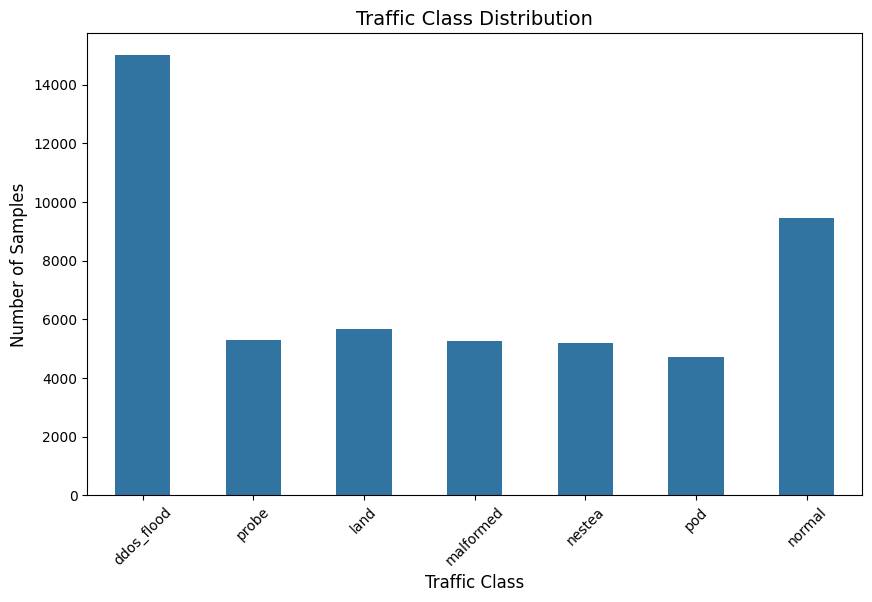

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=combined, x='type', width=0.5)
plt.xticks(rotation=45)
plt.xlabel('Traffic Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Traffic Class Distribution', fontsize=14)
plt.savefig('traffic_class_distribution.png', dpi=300, bbox_inches='tight')